In [7]:
!pip install opendatasets
# !pip install pandas

In [9]:
import opendatasets as od
import pandas


od.download("https://www.kaggle.com/datasets/kapillondhe/american-sign-language")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: riteshpachangane
Your Kaggle Key: ··········


100%|██████████| 4.64G/4.64G [00:49<00:00, 99.7MB/s]


In [11]:
train_dir = "/content/american-sign-language/ASL_Dataset/Train"
test_dir = "/content/american-sign-language/ASL_Dataset/Test"

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
image_data_gen_train = ImageDataGenerator(rescale=1/255., validation_split=0.2)
image_data_gen = ImageDataGenerator(rescale=1/255.)

train_data = image_data_gen_train.flow_from_directory(train_dir,
                                                      subset="training",
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical')

valid_data = image_data_gen_train.flow_from_directory(train_dir,
                                                      subset="validation",
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical')

test_data = image_data_gen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 132542 images belonging to 28 classes.
Found 33128 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


In [52]:
model_1 = keras.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(28, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [53]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_39 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [55]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
4142/4142 [==============================] - 524s 127ms/step - loss: 0.2867 - accuracy: 0.9158 - val_loss: 0.9496 - val_accuracy: 0.8422
Epoch 2/5
4142/4142 [==============================] - 505s 122ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.8761 - val_accuracy: 0.8781
Epoch 3/5
4142/4142 [==============================] - 475s 115ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 1.7937 - val_accuracy: 0.8095
Epoch 4/5
4142/4142 [==============================] - 494s 119ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 1.5140 - val_accuracy: 0.8688
Epoch 5/5
4142/4142 [==============================] - 456s 110ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 1.4224 - val_accuracy: 0.8695


In [142]:
# Predecting image from random image
import random
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import os
import numpy as np

def random_image(target_dir, target_class):

  target_folder = target_dir + "/" + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = imread(target_folder + "/" + random_image[0])
  return img

def predImgRoot(model, target_img):
    class_names = sorted(os.listdir(test_dir))
    img = imread(target_img)
    img_shape = 224

    img = tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[np.argmax(tf.round(pred))]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)
    return pred_class


def predImg(model):
    class_names = sorted(os.listdir(test_dir))
    target_class = random.choice(class_names)
    img = random_image(train_dir, target_class)
    img_shape = 224

    img = tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[np.argmax(tf.round(pred))]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class} : actual: {target_class}')
    plt.axis(False)
    return pred_class

1/1 [==============================] - 0s 19ms/step


'C'

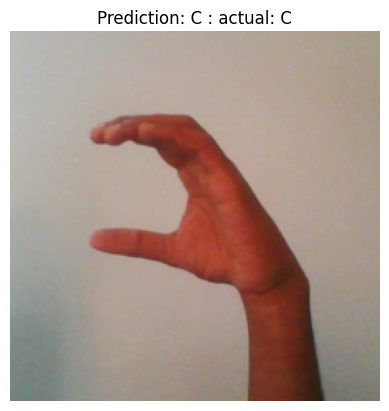

In [161]:
predImg(model_1)

In [166]:
# predImgRoot(model_1, '/content/360_F_210894067_yOcAwjhQVZ9BhW6gy2qVUMrrpXk775ov.jpg')

In [81]:
model_1.evaluate(test_data)

4/4 [==============================] - 1s 163ms/step - loss: 1.3554e-04 - accuracy: 1.0000


[0.00013553643657360226, 1.0]

In [82]:
model_1.save('./drive/MyDrive/KaggleML/Sign_language/model_1.h5')

In [83]:
model_2 = tf.keras.models.load_model('./drive/MyDrive/KaggleML/Sign_language/model_1.h5')

In [85]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_39 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [87]:
tf.round(model_2.predict(tf.expand_dims(img, axis=0)))

1/1 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>